# Tarea Clustering
## Ralphy Núñez Mercado

### ⬇️ Imports necesarios

In [130]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

### ⌛ Preparar dataset 

In [131]:
df = pd.read_csv('shopping_trends.csv')

df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [132]:
df.columns=['ID','Edad','Genero','Objeto Comprado','Categoria','Precio (USD)','Localizacion','Talla','Color','Estacion','Calificacion de la reseña','Estado de la subscripcion','Metodo de pago','Tipo de envio','Descuento aplicado','Uso codigo promocional','Compras anteriores','Metodo de pago preferido','Frecuencia de compra']

df

,ID,Edad,Genero,Objeto Comprado,Categoria,Precio (USD),Localizacion,Talla,Color,Estacion,Calificacion de la reseña,Estado de la subscripcion,Metodo de pago,Tipo de envio,Descuento aplicado,Uso codigo promocional,Compras anteriores,Metodo de pago preferido,Frecuencia de compra
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [133]:
df.describe()


,ID,Edad,Precio (USD),Calificacion de la reseña,Compras anteriores
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### 🔎 Buscnar valores nulos

In [134]:
df.isnull().sum()


ID                           0
Edad                         0
Genero                       0
Objeto Comprado              0
Categoria                    0
Precio (USD)                 0
Localizacion                 0
Talla                        0
Color                        0
Estacion                     0
Calificacion de la reseña    0
Estado de la subscripcion    0
Metodo de pago               0
Tipo de envio                0
Descuento aplicado           0
Uso codigo promocional       0
Compras anteriores           0
Metodo de pago preferido     0
Frecuencia de compra         0
dtype: int64

### Buscar valores duplicados

In [135]:
df.duplicated().sum()


np.int64(0)

### Procesar datos (Encodear y Estandarizar los datos)

In [136]:
valores_numericos = ['Edad', 'Precio (USD)', 'Calificacion de la reseña', 'Compras anteriores']
valores_categoricos = ['Genero', 'Categoria', 'Localizacion', 'Estado de la subscripcion', 
                        'Metodo de pago', 'Tipo de envio', 'Frecuencia de compra']

df_=df[valores_numericos+valores_categoricos]
label_encoder = LabelEncoder()

for col in valores_categoricos:
    df_.loc[:, col] = label_encoder.fit_transform(df_[col])

scaler = StandardScaler()

df_c =pd.DataFrame(scaler.fit_transform(df_),columns=df_.columns)



### Método Elbow

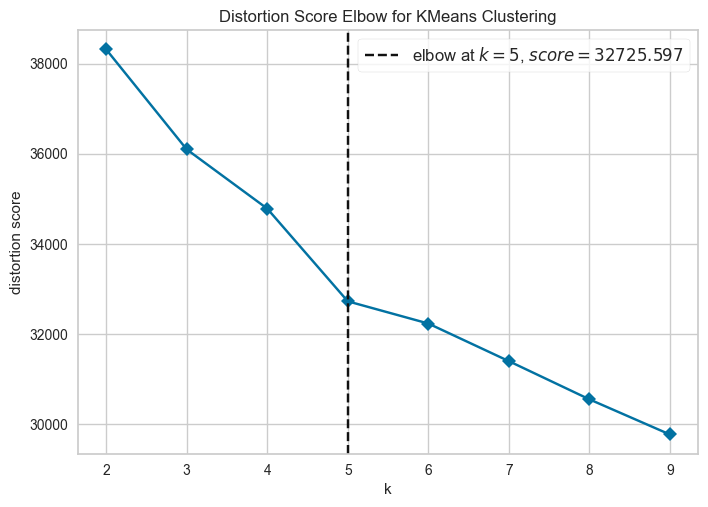

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [137]:


from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Crear el modelo K-Means
model = KMeans(init='k-means++', random_state=42)

# Visualizador del codo
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)

# Ajustar y mostrar el gráfico
visualizer.fit(df_c)
visualizer.show()

### Entrenar el modelo

In [138]:
kmeans = KMeans(n_clusters=2, random_state=42,init='k-means++')  
df_cls = kmeans.fit_predict(df_c)

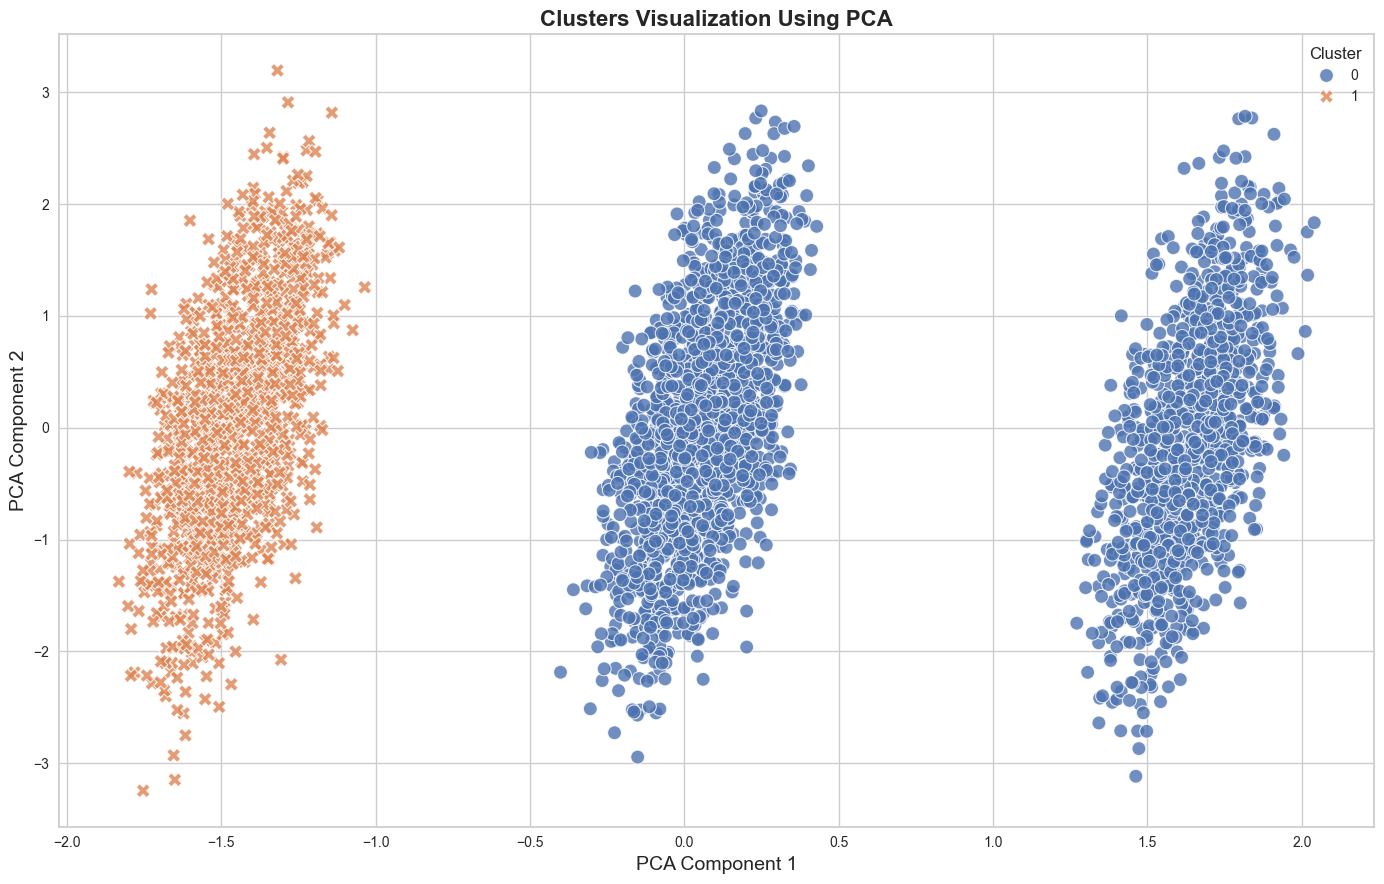

In [139]:
pca = PCA(n_components=2)
df_d = pca.fit_transform(df_c)
plt.figure(figsize=(14, 9))
scatter = sns.scatterplot(
    x=df_d[:, 0],
    y=df_d[:, 1],
    hue=df_cls,
    palette='deep',
    style=df_cls, 
    s=100,
    alpha=0.8 
)

plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)

plt.title('Clusters Visualization Using PCA', fontsize=16, fontweight='bold')

plt.legend(title='Cluster', loc='upper right', fontsize=10, title_fontsize=12)

plt.grid(True)
plt.tight_layout() 
plt.show()

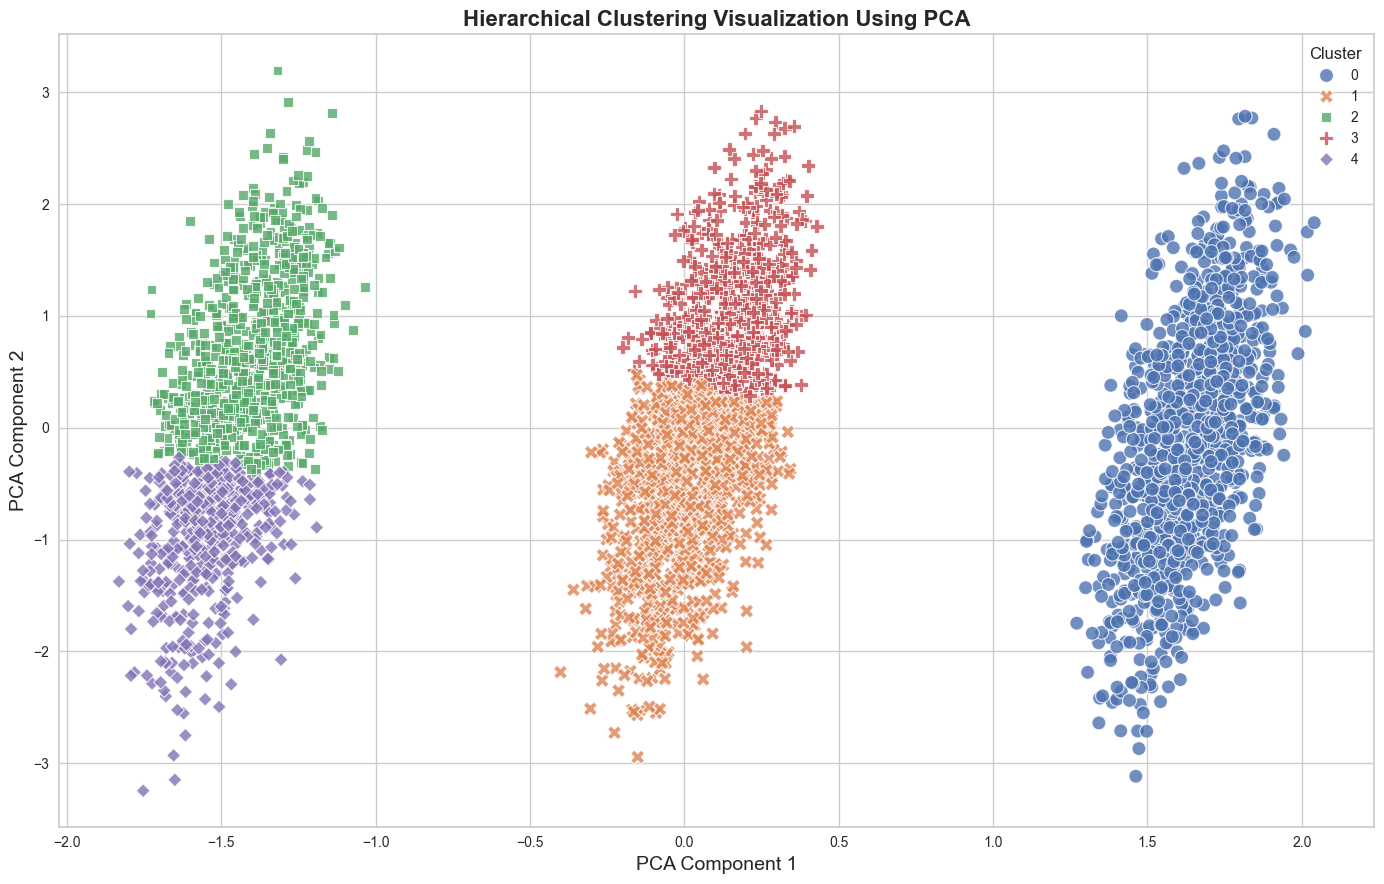

In [140]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
clusters_agg = agg_clustering.fit_predict(df_d)

plt.figure(figsize=(14, 9))
sns.scatterplot(
    x=df_d[:, 0], 
    y=df_d[:, 1], 
    hue=clusters_agg, 
    palette='deep', 
    style=clusters_agg, 
    s=100, 
    alpha=0.8
)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.title('Hierarchical Clustering Visualization Using PCA', fontsize=16, fontweight='bold')
plt.legend(title='Cluster', loc='upper right', fontsize=10, title_fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

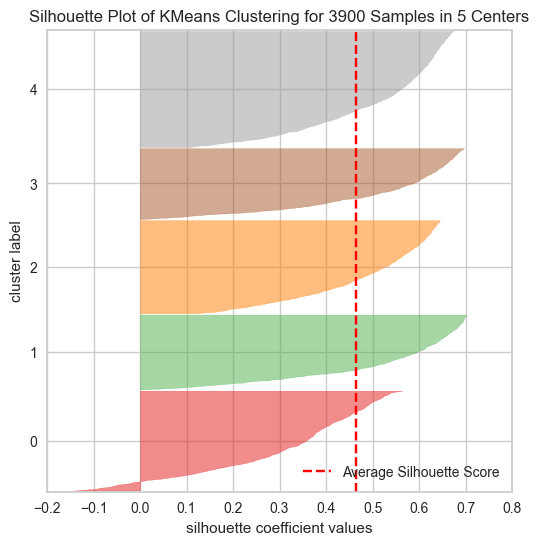

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3900 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [141]:

from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

# Entrenar modelo con k=3
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++')
df_cls = kmeans.fit_predict(df_d)

# Visualizar la silueta
fig, ax = plt.subplots(figsize=(6,6))
visualizer = SilhouetteVisualizer(kmeans, ax=ax)
visualizer.fit(df_d)
visualizer.show()
